# This notebook goes through the options for orthopyroxene-Liquid and orthopyroxene-only thermobarometry. 

#### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

## First, load the necessary python things

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Now, load the data 

In [3]:
out=pt.import_excel('Opx_Liq_Example.xlsx', sheet_name="Paired_Opx_Liq")
my_input=out['my_input']
Liqs=out['Liqs']
Opxs=out['Opxs']

# Working out options for thermometers/barometers
- At any point, you can do help(pt.function) to get some more information

## For example, here we get information on inputs/outputs for Opx-Liq thermometry, including the equation options

In [4]:
help(pt.calculate_opx_liq_temp)

Help on function calculate_opx_liq_temp in module Thermobar.orthopyroxene_thermobarometry:

calculate_opx_liq_temp(*, equationT, opx_comps=None, liq_comps=None, meltmatch=None, P=None, eq_tests=False, Fe3Fet_Liq=None, H2O_Liq=None)
     Orthopyroxene-Liquid thermometer, user specifies equation,
     and calculates temperature in Kelvin.  Also has option to calculate equilibrium tests.
    
    Parameters
     -------
    
     opx_comps: DataFrame
         Orthopyroxene compositions with column headings SiO2_Opx, MgO_Opx etc.
    
     liq_comps: DataFrame
         Liquid compositions with column headings SiO2_Liq, MgO_Liq etc.
    
     meltmatch: DataFrame
         Combined Opx-Liquid compositions. Used for "melt match" functionality.
    
     EquationT: str
         Choice of equation:
         |  T_Opx_Beatt1993
         |  T_Put2008_eq28a
         |  T_Put2008_eq28b_opx_sat
    
    
     P: float, int, series, str  ("Solve")
         Pressure in kbar
         Only needed for P-s

## Alternatively, you can access the function names as well as the inputs like this:

In [5]:
pt.Opx_Liq_T_funcs

{<function Thermobar.orthopyroxene_thermobarometry.T_Beatt1993_opx(P, *, CaO_Liq_cat_frac, FeOt_Liq_cat_frac, MgO_Liq_cat_frac, MnO_Liq_cat_frac, Al2O3_Liq_cat_frac, TiO2_Liq_cat_frac)>,
 <function Thermobar.orthopyroxene_thermobarometry.T_Put2008_eq28a(P, *, H2O_Liq, ln_Fm2Si2O6_liq, MgO_Liq_cat_frac, K2O_Liq_cat_frac, FeOt_Liq_cat_frac, FeOt_Opx_cat_6ox)>,
 <function Thermobar.orthopyroxene_thermobarometry.T_Put2008_eq28b_opx_sat(P, *, H2O_Liq, MgO_Liq_cat_frac, CaO_Liq_cat_frac, K2O_Liq_cat_frac, MnO_Liq_cat_frac, FeOt_Liq_cat_frac, FeOt_Opx_cat_6ox, Al2O3_Liq_cat_frac, TiO2_Liq_cat_frac, Mg_Number_Liq_NoFe3)>}

In [6]:
pt.Opx_Liq_P_funcs

{<function Thermobar.orthopyroxene_thermobarometry.P_Put2008_eq29a(T, *, SiO2_Liq_cat_frac, MgO_Liq_cat_frac, FeOt_Opx_cat_6ox, FmAl2SiO6, Na2O_Liq_cat_frac, Al2O3_Liq_cat_frac, K2O_Liq_cat_frac, H2O_Liq, NaAlSi2O6)>,
 <function Thermobar.orthopyroxene_thermobarometry.P_Put2008_eq29b(T, *, ln_FmAl2SiO6_liq, Al2O3_Liq_cat_frac, MgO_Liq_cat_frac, FeOt_Liq_cat_frac, SiO2_Opx_cat_6ox, FeOt_Opx_cat_6ox, Na2O_Liq_cat_frac, K2O_Liq_cat_frac, H2O_Liq)>,
 <function Thermobar.orthopyroxene_thermobarometry.P_Put_Felsic_Opx(T=None, *, Al2O3_Opx, Al2O3_Liq)>,
 <function Thermobar.orthopyroxene_thermobarometry.P_Put_Global_Opx(T=None, *, MgO_Liq, Al2O3_Opx, Al2O3_Liq, Na2O_Liq, K2O_Liq)>}

# Example 1 - temperature for a known pressure and water content
- Here, we calculate temperature using the H2O content given in the H2O_Liq column (the default), and P=5 kbar
- We choose T_Put2008_eq28a for temperature

In [7]:
Temp_T28a=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs, equationT="T_Put2008_eq28a", P=5)
Temp_T28a

0    1391.122951
1    1391.135930
2    1335.249511
3    1350.916688
4    1311.016109
dtype: float64

## Or we can overwrite the water content from the input excel spreadsheet in the function using an integer

In [8]:
Temp_T28a_0H2O=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs, equationT="T_Put2008_eq28a", P=5, H2O_Liq=0)
Temp_T28a_0H2O

0    1451.178325
1    1492.564583
2    1426.377807
3    1444.872220
4    1397.863370
dtype: float64

## We can also specify eq_tests=True to get a full dataframe back with all the components, as well as a number of equilibrium test values

In [9]:
Temp_T28a_0H2O_EqTests=pt.calculate_opx_liq_temp(opx_comps=Opxs, liq_comps=Liqs, 
                        equationT="T_Put2008_eq28a", P=5, H2O_Liq=0, eq_tests=True)
Temp_T28a_0H2O_EqTests

,T_K_calc,Eq_Test_Kd_Fe_Mg_Fet,Eq_Test_Kd_Fe_Mg_Fe2,SiO2_Liq,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,...,Di_Opx,Mgno_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Delta_Kd_Fe_Mg_Fe2,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,1451.178325,0.251582,0.251582,51.1,Y,0.93,17.5,8.91,0.18,6.09,...,0.028142,0.828850,5.211708,-2.879647,0.251582,0.251582,0.304877,0.053295,0.549218,0.549218
1,1492.564583,0.165104,0.165104,51.5,N,1.19,19.2,8.70,0.19,4.98,...,0.068126,0.860725,5.202722,3.931199,0.165104,0.165104,0.303256,0.138151,0.505036,0.505036
2,1426.377807,0.187634,0.187634,59.1,N,0.54,19.1,5.22,0.19,3.25,...,0.074962,0.855382,5.851735,4.175071,0.187634,0.187634,0.277184,0.089550,0.526025,0.526025
3,1444.872220,0.211297,0.211297,52.5,N,0.98,19.2,8.04,0.20,4.99,...,0.053125,0.839637,5.426741,1.519044,0.211297,0.211297,0.300632,0.089335,0.525239,0.525239
4,1397.863370,0.144506,0.144506,56.2,N,0.34,20.4,5.88,0.20,2.58,...,0.033103,0.844054,6.297377,2.489832,0.144506,0.144506,0.290284,0.145777,0.438875,0.438875


# Example 2 - Calculating pressure for a known temperature

In [10]:
Temp_P29a=pt.calculate_opx_liq_press(opx_comps=Opxs, liq_comps=Liqs, equationP="P_Put2008_eq29a", T=1300)
Temp_P29a

0     2.401637
1    12.237354
2     9.658047
3     5.585392
4     5.739632
dtype: float64

## Can do the same as for temperature, overwriting water in the function, asking for equilibrium tests. Using equation 29a from Putirka (2008) this time

In [11]:
Temp_P29a_0H2O=pt.calculate_opx_liq_press(opx_comps=Opxs, liq_comps=Liqs, 
    equationP="P_Put2008_eq29a", T=1300, H2O_Liq=0, eq_tests=True)
Temp_P29a_0H2O

,SiO2_Liq,P_kbar_calc,Eq_Test_Kd_Fe_Mg_Fet,Eq_Test_Kd_Fe_Mg_Fe2,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,...,Di_Opx,Mgno_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Delta_Kd_Fe_Mg_Fe2,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,51.1,-0.440763,0.251582,0.251582,Y,0.93,17.5,8.91,0.18,6.09,...,0.028142,0.828850,5.211708,-2.879647,0.251582,0.251582,0.304877,0.053295,0.549218,0.549218
1,51.5,7.599754,0.165104,0.165104,N,1.19,19.2,8.70,0.19,4.98,...,0.068126,0.860725,5.202722,3.931199,0.165104,0.165104,0.303256,0.138151,0.505036,0.505036
2,59.1,5.020447,0.187634,0.187634,N,0.54,19.1,5.22,0.19,3.25,...,0.074962,0.855382,5.851735,4.175071,0.187634,0.187634,0.277184,0.089550,0.526025,0.526025
3,52.5,0.947792,0.211297,0.211297,N,0.98,19.2,8.04,0.20,4.99,...,0.053125,0.839637,5.426741,1.519044,0.211297,0.211297,0.300632,0.089335,0.525239,0.525239
4,56.2,1.102032,0.144506,0.144506,N,0.34,20.4,5.88,0.20,2.58,...,0.033103,0.844054,6.297377,2.489832,0.144506,0.144506,0.290284,0.145777,0.438875,0.438875


## Can also specify a different Fe3FeT_Liq ratio, as delta Kd is calculated using just Fe2+ in the melt
- you can compare the equilibrium tests from Fet and Fe2 in the output columns. For the equilibrium test, we only use Fe2+

In [12]:
Temp_P29a_0H2O_30Fe=pt.calculate_opx_liq_press(opx_comps=Opxs, liq_comps=Liqs, equationP="P_Put2008_eq29a", T=1300, H2O_Liq=0, 
                                               eq_tests=True, Fe3Fet_Liq=0.3)
Temp_P29a_0H2O_30Fe

,SiO2_Liq,P_kbar_calc,Eq_Test_Kd_Fe_Mg_Fet,Eq_Test_Kd_Fe_Mg_Fe2,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,...,Di_Opx,Mgno_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Delta_Kd_Fe_Mg_Fe2,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,51.1,-0.440763,0.251582,0.359403,Y,0.93,17.5,8.91,0.18,6.09,...,0.028142,0.828850,5.211708,-2.879647,0.251582,0.359403,0.304877,0.054526,0.549218,0.635106
1,51.5,7.599754,0.165104,0.235863,N,1.19,19.2,8.70,0.19,4.98,...,0.068126,0.860725,5.202722,3.931199,0.165104,0.235863,0.303256,0.067392,0.505036,0.593105
2,59.1,5.020447,0.187634,0.268049,Y,0.54,19.1,5.22,0.19,3.25,...,0.074962,0.855382,5.851735,4.175071,0.187634,0.268049,0.277184,0.009135,0.526025,0.613220
3,52.5,0.947792,0.211297,0.301853,Y,0.98,19.2,8.04,0.20,4.99,...,0.053125,0.839637,5.426741,1.519044,0.211297,0.301853,0.300632,0.001221,0.525239,0.612473
4,56.2,1.102032,0.144506,0.206437,N,0.34,20.4,5.88,0.20,2.58,...,0.033103,0.844054,6.297377,2.489832,0.144506,0.206437,0.290284,0.083846,0.438875,0.527708


# Example 3 - Iterating pressure and temperature
- In reality, unles you are an experimentalist, you rarely know pressure and temperature
- In Keith Putirka's spreadsheets, you can link up columns to iterate P and T towards a solution, this can be done here using the function calculate_opx_liq_press_temp

## Here, we iterate equation 29b from Putirka (2008) for P, and Temp from Beattie (1993) for temperature
- Without specifying anything else, you get a dataframe with columns for calculated pressure and temperature

In [13]:
PT_iter_29b_Beatt=pt.calculate_opx_liq_press_temp(opx_comps=Opxs, liq_comps=Liqs, equationP="P_Put2008_eq29b", 
                                                  equationT="T_Beatt1993_opx")
PT_iter_29b_Beatt

,P_kbar_calc,T_K_calc
0,-2.083363,1396.863533
1,15.124832,1499.003345
2,15.723512,1496.583095
3,6.616612,1445.263817
4,6.404897,1400.627400


Again, you can also specify eq_tests=True

In [14]:
PT_iter_29b_Beatt_EqTests=pt.calculate_opx_liq_press_temp(opx_comps=Opxs, liq_comps=Liqs, equationP="P_Put2008_eq29b", equationT="T_Beatt1993_opx", eq_tests=True)
PT_iter_29b_Beatt_EqTests

,P_kbar_calc,T_K_calc,SiO2_Liq,Eq_Test_Kd_Fe_Mg_Fet,Eq_Test_Kd_Fe_Mg_Fe2,Kd Eq (Put2008+-0.06),TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,...,Di_Opx,Mgno_OPX,ln_Fm2Si2O6_liq,ln_FmAl2SiO6_liq,Kd_Fe_Mg_Fet,Kd_Fe_Mg_Fe2,Ideal_Kd,Delta_Kd_Fe_Mg_Fe2,Mgno_Liq_noFe3,Mgno_Liq_Fe2
0,-2.083363,1396.863533,51.1,0.251582,0.251582,Y,0.93,17.5,8.91,0.18,...,0.028142,0.828850,5.211708,-2.879647,0.251582,0.251582,0.304877,0.053295,0.549218,0.549218
1,15.124832,1499.003345,51.5,0.165104,0.165104,N,1.19,19.2,8.70,0.19,...,0.068126,0.860725,5.202722,3.931199,0.165104,0.165104,0.303256,0.138151,0.505036,0.505036
2,15.723512,1496.583095,59.1,0.187634,0.187634,N,0.54,19.1,5.22,0.19,...,0.074962,0.855382,5.851735,4.175071,0.187634,0.187634,0.277184,0.089550,0.526025,0.526025
3,6.616612,1445.263817,52.5,0.211297,0.211297,N,0.98,19.2,8.04,0.20,...,0.053125,0.839637,5.426741,1.519044,0.211297,0.211297,0.300632,0.089335,0.525239,0.525239
4,6.404897,1400.627400,56.2,0.144506,0.144506,N,0.34,20.4,5.88,0.20,...,0.033103,0.844054,6.297377,2.489832,0.144506,0.144506,0.290284,0.145777,0.438875,0.438875


# Example 4: Orthopyroxene only barometry
- very similar to opx-liq functions, just dont need to specify liquid compositions
- Most common problem is that equation 29c uses the ln of the Cr2O3 component, which if you dont enter any Cr, means the function returns a NaN (as you can't ln a zero). 

In [15]:
Press=pt.calculate_opx_only_press(opx_comps=Opxs, equationP="P_Put2008_eq29c", T=1300)
Press

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\orthopyroxene_thermobarometry.py:178: UserWarning: The selected barometer uses the log of Cr2O3 component of Opx, which is zero for some of your compositions. This means the function will return infinity.
  w.warn('The selected barometer uses the log of Cr2O3 component of '
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    0.631893
1         NaN
2    5.410426
3    0.482388
4    0.397185
dtype: float64

# Example 5: Plotting orthopyroxene compositions on a rhodes diagram
- Option 1, specify simple=True, just uses 0.29 +-0.07 from Putirka (2008)
- Option 2, specify a liquid composition (say lots of opxs from a single lava flow), calculates mean Si cation fraction for all liquids, uses this to calculate KD
- Option 3, specify a min and max Kd

### step 1 - calculate Mg# for opx and liquid (can either treat FeT as Fe2, or partition into Fe2 and Fe3, only calculated Kd using Fe2)

In [16]:
opx_comps_Fe3=pt.calculate_orthopyroxene_liquid_components(liq_comps=Liqs, opx_comps=Opxs, Fe3Fet_Liq=0.2)

### Step 2 - calculate rhodes diagram lines between Mg#=0.4 and Mg#=0.7

In [17]:
eq_lines_1=pt.calculate_opx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7)
eq_lines_1.head()

,Mg#_Liq,Eq_Opx_Mg# (Kd=0.23),Eq_Opx_Mg# (Kd=0.29),Eq_Opx_Mg# (Kd=0.35)
0,0.400000,0.743494,0.696864,0.655738
1,0.403030,0.745892,0.699521,0.658579
2,0.406061,0.748269,0.702159,0.661402
3,0.409091,0.750626,0.704777,0.664207
4,0.412121,0.752962,0.707375,0.666994


### Step 3 - Plot these lines, along with measured opxs. Here we draw symbols where we account for Fe3+ (diamond), and just using Fet in the glas (stars)

Text(0, 0.5, 'Mg# Opx')

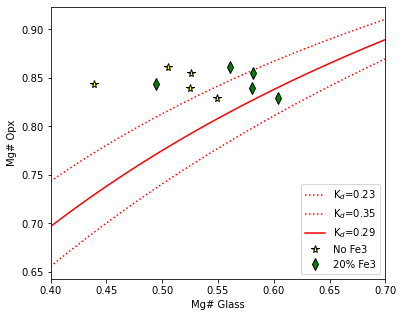

In [18]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Opx_Mg# (Kd=0.23)'], ':r', label="K$_d$=0.23")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Opx_Mg# (Kd=0.35)'], ':r', label="K$_d$=0.35")
ax1.plot(eq_lines_1['Mg#_Liq'], eq_lines_1['Eq_Opx_Mg# (Kd=0.29)'], '-r', label="K$_d$=0.29")
ax1.set_xlim([0.4, 0.7])
ax1.plot(opx_comps_Fe3['Mgno_Liq_noFe3'], opx_comps_Fe3['Mgno_OPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(opx_comps_Fe3['Mgno_Liq_Fe2'], opx_comps_Fe3['Mgno_OPX'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Opx')

## Alternatively, can use a Kd model based on the Si content of the liquid
- In this case, we enter a liquid composition into the rhodes diagram function
- As this works by averaging the Si content of all inputted liquid to calculate Kd, this only recomended if liquids very similar in composition)

In [19]:
eq_lines_2=pt.calculate_opx_rhodes_diagram_lines(Min_Mgno=0.4, Max_Mgno=0.7, liq_comps=Liqs)
eq_lines_2.head()

,Mg#_Liq,Eq_Opx_Mg# (Kd=0.23),Eq_Opx_Mg# (Kd=0.29),Eq_Opx_Mg# (Kd=0.35),Kd_XSi_P2008,Eq_Opx_Mg# (Kd_XSi_P2008),Eq_Opx_Mg# (Kd_XSi_P2008)+0.06,Eq_Opx_Mg# (Kd_XSi_P2008)-0.06
0,0.400000,0.743494,0.696864,0.655738,0.295247,0.693063,0.652371,0.739169
1,0.403030,0.745892,0.699521,0.658579,0.295247,0.695739,0.655225,0.741593
2,0.406061,0.748269,0.702159,0.661402,0.295247,0.698396,0.658062,0.743997
3,0.409091,0.750626,0.704777,0.664207,0.295247,0.701033,0.660880,0.746380
4,0.412121,0.752962,0.707375,0.666994,0.295247,0.703650,0.663681,0.748743


Text(0, 0.5, 'Mg# Opx')

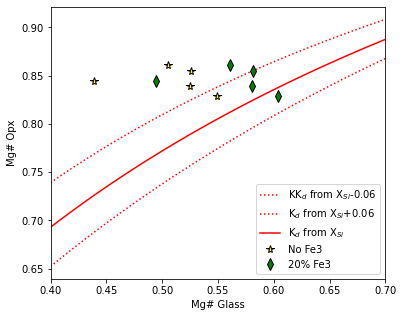

In [20]:
fig, (ax1) = plt.subplots(1, 1, figsize = (6,5))
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Opx_Mg# (Kd_XSi_P2008)-0.06'], ':r', label="KK$_d$ from X$_{Si}$-0.06")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Opx_Mg# (Kd_XSi_P2008)+0.06'], ':r', label="K$_d$ from X$_{Si}$+0.06")
ax1.plot(eq_lines_2['Mg#_Liq'], eq_lines_2['Eq_Opx_Mg# (Kd_XSi_P2008)'], '-r', label="K$_d$ from X$_{Si}$")
ax1.set_xlim([0.4, 0.7])
ax1.plot(opx_comps_Fe3['Mgno_Liq_noFe3'], opx_comps_Fe3['Mgno_OPX'], '*k', mfc='yellow', ms=8, label="No Fe3")
ax1.plot(opx_comps_Fe3['Mgno_Liq_Fe2'], opx_comps_Fe3['Mgno_OPX'], 'dk', mfc='green', ms=8, label="20% Fe3")
ax1.legend()
ax1.set_xlabel('Mg# Glass')
ax1.set_ylabel('Mg# Opx')